In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from soilgasflux_fcs import multiprocess_raw_data, json_reader, fcs
from soilgasflux_fcs import synthetic_postProcessing
import pathlib
import matplotlib.pyplot as plt
import xarray as xr

In [22]:
data_path = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test07')
a = json_reader.Initializer(folderPath=data_path)
df = a.prepare_rawdata()

In [23]:
a = multiprocess_raw_data.Multiprocessor()
b = a.run(df=df, chamber_id='test07', output_folder=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data')

Multiprocessing started
CPU core count: 14
Date: 2025-05-08
Processing ID: 2025-5-8_15-58-56
Processing ID: 2025-5-8_15-46-56
Processing ID: 2025-5-8_15-43-56
Processing ID: 2025-5-8_15-52-56
Processing ID: 2025-5-8_15-28-56
Processing ID: 2025-5-8_15-22-56
Processing ID: 2025-5-8_15-55-56
Processing ID: 2025-5-8_15-49-56
Processing ID: 2025-5-8_15-31-56
Processing ID: 2025-5-8_15-34-56
Processing ID: 2025-5-8_16-1-56
Processing ID: 2025-5-8_15-25-56
Processing ID: 2025-5-8_15-37-56
Processing ID: 2025-5-8_15-40-56
Results: dict_keys(['2025-5-8_15-43-56'])
Processing ID: 2025-5-8_16-4-56
Results: dict_keys(['2025-5-8_15-37-56'])
Processing ID: 2025-5-8_16-7-56
Results: dict_keys(['2025-5-8_15-34-56'])
Processing ID: 2025-5-8_16-10-56
Results: dict_keys(['2025-5-8_15-25-56'])
Processing ID: 2025-5-8_16-13-56
Results: dict_keys(['2025-5-8_15-49-56'])
Processing ID: 2025-5-8_16-16-56
Results: dict_keys(['2025-5-8_15-52-56'])
Processing ID: 2025-5-8_16-19-56
Results: dict_keys(['2025-5-8_1

In [24]:
c = multiprocess_raw_data.Multiprocessor()
d = c.run_MC(df=df, chamber_id='test07_MC', output_folder=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data')

Multiprocessing started
CPU core count: 14
Date: 2025-05-08
Processing ID: 2025-5-8_15-34-56
Processing ID: 2025-5-8_15-28-56
Processing ID: 2025-5-8_15-40-56
Processing ID: 2025-5-8_15-31-56
Processing ID: 2025-5-8_15-58-56
Processing ID: 2025-5-8_15-43-56
Processing ID: 2025-5-8_15-37-56
Processing ID: 2025-5-8_15-25-56
Processing ID: 2025-5-8_15-52-56
Processing ID: 2025-5-8_16-1-56
Processing ID: 2025-5-8_15-55-56
Processing ID: 2025-5-8_15-46-56
Processing ID: 2025-5-8_15-22-56
Processing ID: 2025-5-8_15-49-56
ERROR HM ####
a must be greater than 0 unless no samples are taken
Deadband: 50, Cutoff: 110
Results: dict_keys(['2025-5-8_15-22-56'])
Processing ID: 2025-5-8_16-4-56
Results: dict_keys(['2025-5-8_15-28-56'])
Processing ID: 2025-5-8_16-7-56
Results: dict_keys(['2025-5-8_16-1-56'])
Processing ID: 2025-5-8_16-10-56
Results: dict_keys(['2025-5-8_15-40-56'])
Processing ID: 2025-5-8_16-13-56
Results: dict_keys(['2025-5-8_15-46-56'])
Results: dict_keys(['2025-5-8_15-58-56'])
Proce

In [29]:
expected_synthetic = synthetic_postProcessing.Synthetic(processed_data=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/test07_2025-05-08.nc',
                                                      raw_dataFolder=data_path)
expected_results = expected_synthetic.get_expectedResults()

test07_2025-05-08.nc
Synthetic initialized
             datetime         datetime_utc    k30_co2  bmp_pressure  \
0 2025-05-08 15:22:56  2025-05-08 15:22:56  432.48287       99000.0   

   bmp_temperature  si_humidity  si_temperature                 id  timedelta  \
0             20.0         70.0            20.0  2025-5-8_15-22-56          0   

      alpha     c_s  c_c0  deadband  disturbance_intensity  \
0  0.000187  1000.0   430         0                      0   

   disturbance_starting_point  add_noise curvature         id_datetime  
0                           0      False       big 2025-05-08 15:22:56  
             datetime         datetime_utc     k30_co2  bmp_pressure  \
0 2025-05-08 15:25:56  2025-05-08 15:25:56  428.759955       99000.0   

   bmp_temperature  si_humidity  si_temperature                 id  timedelta  \
0             20.0         70.0            20.0  2025-5-8_15-25-56          0   

     alpha      c_s  c_c0  deadband  disturbance_intensity  \
0  0.00001

In [30]:
expected_results.to_netcdf(r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/expected_test07_2025-05-08.nc')

In [5]:
ds = xr.open_dataset('/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/test05_MC_2025-05-08.nc')
# ds = xr.open_dataset('/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/synthetic_test07_mc2_2025-05-08.nc')

In [12]:
ds.isel(time=20, cutoff=3, deadband=1)['dcdt(HM)'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [13]:
#ds = xr.open_dataset('./output/synthetic_test03_2025-03-31.nc')
#ds = xr.open_dataset('./output/expected_synthetic_test04_01_2025-03-31.nc')
ds = xr.open_dataset('./output/synthetic_test03_1000log1_mc_2025-03-31.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/output/synthetic_test03_1000log1_mc_2025-03-31.nc'

In [8]:
ds

<xarray.Dataset> Size: 178MB
Dimensions:        (time: 45, cutoff: 15, deadband: 6, MC: 1000)
Coordinates:
  * time           (time) datetime64[ns] 360B 2025-03-31T18:09:27 ... 2025-03...
  * deadband       (deadband) int32 24B 0 10 20 30 40 50
  * cutoff         (cutoff) int32 60B 30 40 50 60 70 80 ... 130 140 150 160 170
  * MC             (MC) int32 4kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
Data variables:
    dcdt(HM)       (time, cutoff, deadband, MC) float32 16MB ...
    dcdt(linear)   (time, cutoff, deadband, MC) float32 16MB ...
    AIC(HM)        (time, cutoff, deadband, MC) float32 16MB ...
    AIC(linear)    (time, cutoff, deadband, MC) float32 16MB ...
    RMSE(HM)       (time, cutoff, deadband, MC) float32 16MB ...
    RMSE(linear)   (time, cutoff, deadband, MC) float32 16MB ...
    R2(HM)         (time, cutoff, deadband, MC) float32 16MB ...
    R2(linear)     (time, cutoff, deadband, MC) float32 16MB ...
    nRMSE(HM)      (time, cutoff, deadband, MC) float32 16MB ...
    nRMSE(linear)  (time, cutoff, deadband, MC) float32 16MB ...
    logprob(HM)    (time, cutoff, deadband, MC) float32 16MB ...

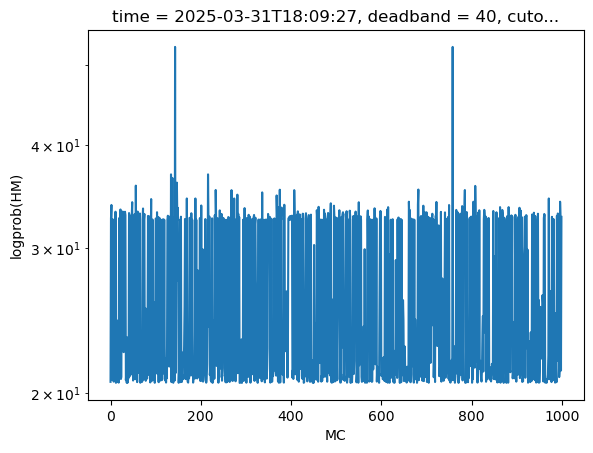

In [9]:
(-ds.isel(time=0, deadband=4, cutoff=10)['logprob(HM)']).plot()
plt.yscale('log')
#plt.ylim(-10000000,0)

In [42]:
import numpy as np

In [52]:
time=1

In [53]:
u_range = (ds.isel(time=time).quantile(0.9, skipna=True, dim=['MC'])['dcdt(HM)']-ds.isel(time=time).quantile(0.1, skipna=True, dim=['MC'])['dcdt(HM)']).values.flatten()

In [54]:
logprob = ds.isel(time=time)['logprob(HM)'].median(dim=['MC']).values.flatten()

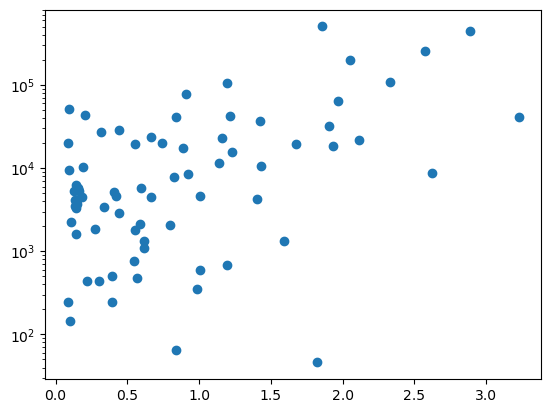

In [55]:
plt.scatter(u_range, -logprob)
plt.yscale('log')

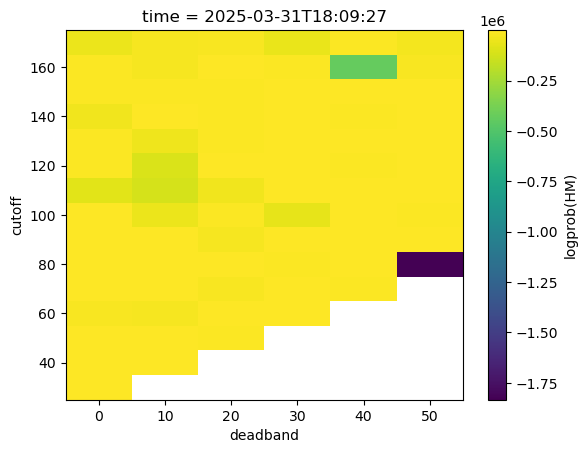

In [29]:
ds.isel(time=0)['logprob(HM)'].median(dim=['MC']).plot()

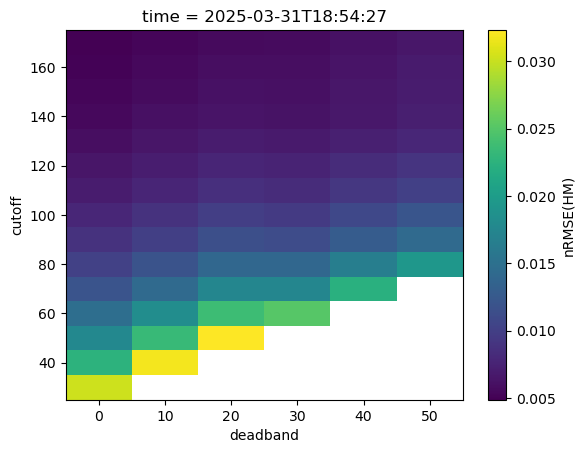

In [10]:
ds.isel(time=15)['nRMSE(HM)'].plot()

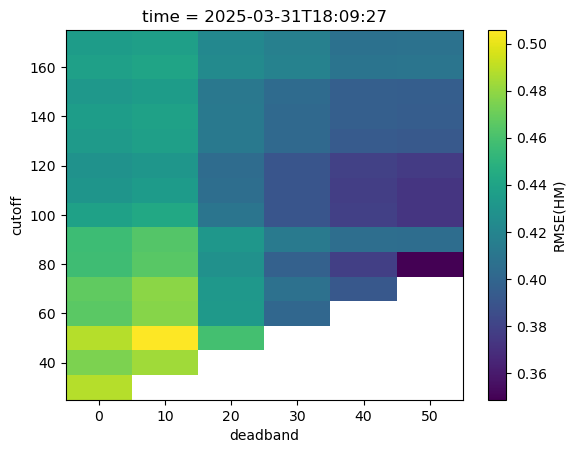

In [11]:
ds.isel(time=0)['RMSE(HM)'].plot()

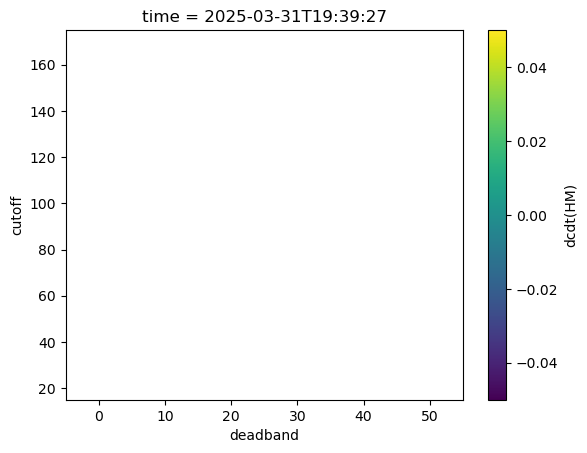

In [8]:
ds.isel(time=30)['dcdt(HM)'].plot()